#TCS RIO 125 Internship project
## Automated Sentiment Analysis of textual comments and feedback 

**Refrance Links from tcs**
1. https://www.intel.com/content/www/us/en/developer/topic-technology/artificial-intelligence/training/courses.html

2. https://python-course.eu/machine-learning/

3. https://scikit-learn.org/stable/tutorial/index.html

4. https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html

5. https://www.tensorflow.org/tutorials

1.  https://www.tensorflow.org/tutorials/keras/classification
2.  https://www.tensorflow.org/tutorials/images/cnn

8. https://www.tensorflow.org/text/tutorials/text_classification_rnn

9. https://www.intel.com/content/www/us/en/developer/learn/course-deep-learning.html

10. https://www.intel.com/content/www/us/en/developer/learn/course-machine-learning.html


###Importing libraries

In [ ]:
import numpy as np
import pandas as pd
print('done')

done


### Importing dataset




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Msc AI /TCS iON Rio -125 internship
!ls

/content/drive/MyDrive/Msc AI /TCS iON Rio -125 internship
 a1_RestaurantReviews_HistoricDump.csv	'Sentiment Analysis P1.ipynb'
 a2_RestaurantReviews_FreshDump.csv


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Msc AI /TCS iON Rio -125 internship/a1_RestaurantReviews_HistoricDump.csv')

In [ ]:
dataset.shape

(900, 2)

In [ ]:
dataset.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [ ]:
dataset['Review'].head()

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: Review, dtype: object

In [ ]:
dataset.shape

(900, 2)

### Data Preprocessing

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus=[]

for i in range(0, 900):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'name',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place ac

### Data transformation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [ ]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [ ]:
type(y)

numpy.ndarray

In [ ]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

### Dividing dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=0)

In [ ]:
X_test.shape

(180, 1420)

In [ ]:
X_train.shape

(720, 1420)

In [ ]:
y_test.shape

(180,)

In [ ]:
y_train.shape

(720,)

##Model fitting

###SVM 

In [ ]:
# SVM model 
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [ ]:
print(Y_pred)

[1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0]


In [ ]:
Y_pred.shape

(180,)

In [ ]:
import joblib
joblib.dump(clf, 'Clf_Sentiment_Model_SVM')

['Clf_Sentiment_Model_SVM']

In [ ]:
type(Y_pred)

numpy.ndarray

In [ ]:
df = pd.DataFrame(Y_pred, columns = ['Polarity'])
df.head(6)

,Polarity
0,1
1,1
2,0
3,1
4,0
5,0


In [ ]:
df.shape

(180, 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Polarity  180 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


In [ ]:
df.count()

Polarity    180
dtype: int64

In [ ]:
# Exporting SVM to later use in prediction
import joblib
joblib.dump(clf, 'Clf_Sentiment_Model')

['Clf_Sentiment_Model']

###Naive Bays 

In [ ]:
# importing Naive Bays model from scikit-learn
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
X_train.shape

(720, 1420)

In [ ]:
y_train.shape

(720,)

In [ ]:
len(y_pred)

180

In [ ]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model')

['c2_Classifier_Sentiment_Model']

##Model performance

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, accuracy_score
# Model Accuracy: how often is the classifier correct?
acc =accuracy_score(y_test, Y_pred)
_cm_ = confusion_matrix(y_test,Y_pred)
print('confusion matrix:\n',_cm_)
print('Accuracy % :',acc*100)

confusion matrix:
 [[58 20]
 [20 82]]
Accuracy % : 77.77777777777779


In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0])

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
# print(cm)
ACc = accuracy_score(y_test, y_pred)
print('Accuracy:',ACc*100)
print('Confusion Matx:\n',cm)

Accuracy: 73.88888888888889
Confusion Matx:
 [[67 11]
 [36 66]]


**"Model accuracy is better with *SVM* than *NAIVE BAYS* algorithm"**

Accuracy Scores
1. SVM =77.7 ~ 78%
2. Naive Bays = 73.8 ~ 74 

(array([103.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  77.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

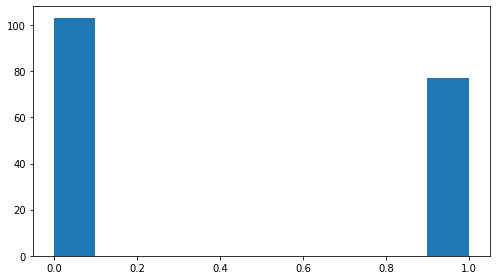

In [ ]:
plt.hist(y_pred)

## Cross Validation

In [ ]:
%cd /content/drive/MyDrive/Msc AI /TCS iON Rio -125 internship
!ls

/content/drive/MyDrive/Msc AI /TCS iON Rio -125 internship
 a1_RestaurantReviews_HistoricDump.csv	'Sentiment Analysis P1.ipynb'
 a2_RestaurantReviews_FreshDump.csv


In [ ]:
q = '/content/drive/MyDrive/Msc AI /TCS iON Rio -125 internship/a2_RestaurantReviews_FreshDump.csv'

In [ ]:
data = pd.read_csv(q)
data.head()

,Review
0,Spend your money elsewhere.
1,Their regular toasted bread was equally satisf...
2,The Buffet at Bellagio was far from what I ant...
3,"And the drinks are WEAK, people!"
4,-My order was not correct.


In [ ]:
data.count

<bound method DataFrame.count of                                                Review
0                         Spend your money elsewhere.
1   Their regular toasted bread was equally satisf...
2   The Buffet at Bellagio was far from what I ant...
3                    And the drinks are WEAK, people!
4                          -My order was not correct.
..                                                ...
95  I think food should have flavor and texture an...
96                           Appetite instantly gone.
97  Overall I was not impressed and would not go b...
98  The whole experience was underwhelming, and I ...
99  Then, as if I hadn't wasted enough of my life ...

[100 rows x 1 columns]>

In [ ]:
data.shape

(100, 1)

In [ ]:
data.describe

<bound method NDFrame.describe of                                                Review
0                         Spend your money elsewhere.
1   Their regular toasted bread was equally satisf...
2   The Buffet at Bellagio was far from what I ant...
3                    And the drinks are WEAK, people!
4                          -My order was not correct.
..                                                ...
95  I think food should have flavor and texture an...
96                           Appetite instantly gone.
97  Overall I was not impressed and would not go b...
98  The whole experience was underwhelming, and I ...
99  Then, as if I hadn't wasted enough of my life ...

[100 rows x 1 columns]>

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]

for i in range(0, 100):
  review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
# Loading BoW dictionary
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cvFile='c1_BoW_Sentiment_Model.pkl'
# cv = CountVectorizer(decode_error="replace", vocabulary=pickle.load(open('./drive/MyDrive/Colab Notebooks/2 Sentiment Analysis (Basic)/3.1 BoW_Sentiment Model.pkl', "rb")))
cv = pickle.load(open(cvFile, "rb"))


In [ ]:
X_fresh = cv.transform(corpus).toarray()
X_fresh.shape

(100, 1420)

In [ ]:
import joblib
classifier = joblib.load('c2_Classifier_Sentiment_Model')
clf = joblib.load('Clf_Sentiment_Model_SVM')

In [ ]:
yf_pred = classifier.predict(X_fresh)
print(yf_pred)

[0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [ ]:
yf2_pred = clf.predict(X_fresh)
print(yf2_pred)

[0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0]


In [ ]:
data['predicted_label'] = yf_pred.tolist()
data.head(10)

In [ ]:
data['predicted_label'] = yf2_pred.tolist()
data.head(10)

In [ ]:
data.to_csv('file1.csv',index= False)

In [ ]:
len(y_test)

180

In [ ]:
len(yf_pred)

100

In [ ]:
len(yf2_pred)

100

## Result Visulization 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('file1.csv')

In [ ]:
df.head()

In [ ]:
plt.rcParams["figure.figsize"] = [7,4]
plt.rcParams["figure.autolayout"] = True
plt.title("Predicted values on unseen data")
# plt.hist(df['predicted_label'].head())

180


(array([103.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  77.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

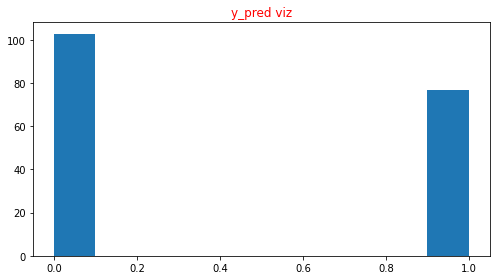

In [ ]:
print(len(y_pred))
plt.title("y_pred viz",c='r')
plt.hist(y_pred)

100


(array([77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

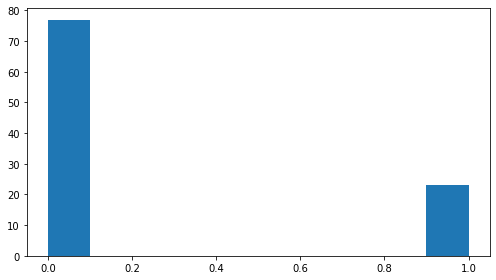

In [ ]:
print(len(yf_pred))
plt.hist(yf_pred)

100


(array([68.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 32.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

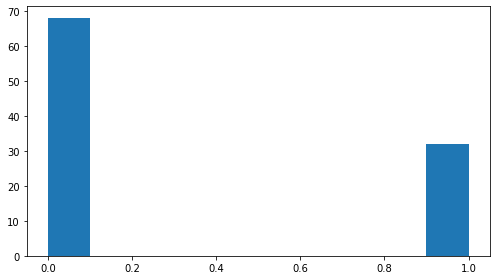

In [ ]:
print(len(yf2_pred))
plt.hist(yf2_pred)

We can conclud from the above plots that most of the feedbacks are negative feedbacks 

# End of The Project